In [7]:
!pip install seaborn
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd

CLASSES = ["Bull", "Bear"]
LABEL_BULL = CLASSES.index("Bull")
LABEL_BEAR = CLASSES.index("Bear")

datasets = np.load("datasets.npz")
x_train, y_train = datasets["x_train"], datasets["y_train"]
x_val, y_val = datasets["x_val"], datasets["y_val"]
x_test, y_test = datasets["x_test"], datasets["y_test"]

label_distribution = pd.DataFrame([{"Dataset": "train", "Bull": np.count_nonzero(y_train == LABEL_BULL), "Bear": np.count_nonzero(y_train == LABEL_BEAR)},
                                   {"Dataset": "val", "Bull": np.count_nonzero(y_val == LABEL_BULL), "Bear": np.count_nonzero(y_val == LABEL_BEAR)},
                                   {"Dataset": "test", "Bull": np.count_nonzero(y_test == LABEL_BULL), "Bear": np.count_nonzero(y_test == LABEL_BEAR)}])
label_distribution

,Dataset,Bull,Bear
0,train,811,823
1,val,228,239
2,test,111,111


In [15]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

model = keras.models.load_model("best_model.h5")

In [16]:
model.evaluate(x_test, to_categorical(y_test))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4283 - loss: 431935.8750  


[398538.875, 0.46396395564079285]

In [17]:
## Draw confusion matrix
from tensorflow.math import confusion_matrix, argmax

y_pred_prob = model.predict(x_test)
y_pred = argmax(y_pred_prob, axis=-1)
cm = confusion_matrix(y_test, y_pred, num_classes=len(CLASSES)).numpy()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


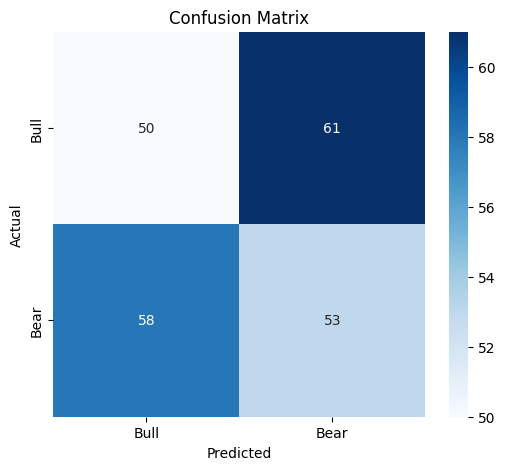

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()